In [175]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold,RepeatedKFold, GridSearchCV,  RandomizedSearchCV
import math
from data import *
import pandas as pd
from itertools import islice
import seaborn as sns; sns.set_theme()
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

Binary Decomposition
- Goal 0: System type classification
- Goal 1: Primary & Secondary decomposition

In [172]:
df = pd.read_hdf('/Users/lukemcdermott/Desktop/Physics/spectral_templates_data_version_june20.h5', key = '/binaries')
bin_df = pd.read_hdf('/Users/lukemcdermott/Desktop/Physics/spectral_templates_data_version_june20.h5', key = '/binaries')
df = df.loc[df['primary_type'] <= df['secondary_type']]
display(df)

,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_434,flux_435,flux_436,flux_437,flux_438,flux_439,flux_440,primary_type,secondary_type,system_type
0,0.568345,0.615487,0.668477,0.705189,0.698754,0.700950,0.717146,0.704941,0.707754,0.723033,...,0.209508,0.203912,0.205196,0.201559,0.207766,0.209226,0.214793,16.0,16.0,16.0
1,0.496365,0.563067,0.602393,0.659527,0.682808,0.676481,0.674343,0.689054,0.676825,0.670386,...,0.213932,0.207528,0.206223,0.201853,0.205284,0.206424,0.206224,16.0,17.0,16.0
2,0.520227,0.580531,0.627045,0.645281,0.665795,0.678923,0.686509,0.685623,0.674414,0.702066,...,0.187648,0.184240,0.177598,0.175445,0.175319,0.181286,0.176042,16.0,16.0,16.0
3,0.483774,0.556865,0.603915,0.641451,0.698212,0.728678,0.666010,0.671234,0.659358,0.688617,...,0.233598,0.225866,0.234960,0.214639,0.219380,0.224144,0.224282,16.0,16.0,16.0
4,0.434787,0.504214,0.543165,0.611378,0.659270,0.680497,0.663214,0.634306,0.645955,0.654454,...,0.218515,0.209248,0.202981,0.198711,0.201315,0.201008,0.202865,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110809,0.030098,0.014580,-0.007441,-0.006942,-0.007369,0.006425,0.016458,0.006826,-0.001549,0.020413,...,-0.000636,-0.005062,-0.001746,0.002502,0.002527,0.002917,0.003646,38.0,38.0,38.0
110810,0.005596,0.004737,-0.002069,0.010406,0.006171,0.009747,0.011305,0.008200,0.004347,0.014751,...,-0.001543,-0.004403,0.001089,0.004393,0.004432,0.004561,-0.000681,38.0,39.0,38.0
110848,0.073538,0.009197,-0.005860,-0.038976,-0.014792,-0.014072,0.036644,-0.001032,-0.009587,0.015874,...,0.003452,-0.007673,-0.005274,0.000802,0.001512,0.001638,0.005702,38.0,38.0,38.0
110849,0.001377,-0.014757,-0.004499,0.012407,-0.003643,-0.001074,0.012893,-0.004316,0.009678,-0.000535,...,-0.000068,-0.007200,0.002112,0.005037,0.006211,0.005238,-0.004113,38.0,39.0,39.0


In [235]:
x = np.insert(np.arange(441), 0, 443)
images = df.iloc[:, :441].to_numpy()
labels = df.iloc[:, 441:443].to_numpy()
labels_flat = np.zeros((len(labels)))
for idx, i in enumerate(labels):
    labels_flat[idx] = 24*(int(i[0]-16)) + int((i[1]-16))

    
# Split into training and testing sets
train_images, train_labels, test_images, test_labels = split_data(images, labels_flat)

30759


In [238]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight = 'balanced')
model.fit(train_images, train_labels)

/Users/lukemcdermott/mambaforge/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [242]:
model.score(test_images, test_labels)

0.13797139141742523

Average Distance Away

In [252]:
outputs = model.predict(test_images)
vout = np.zeros((len(outputs), 2))
vlab = np.zeros((len(outputs), 2))
loss = np.zeros((len(outputs)))
for i in range(len(outputs)):
    vout[i] = np.array([(int(outputs[i]//24)) + 16, outputs[i] - int(outputs[i]//24)*24 + 16])
    vlab[i] = np.array([(int(test_labels[i]//24)) + 16, test_labels[i] - int(test_labels[i]//24)*24 + 16])
    loss[i] = ((vout[i]-vlab[i])**2).mean()**(1/2)

In [253]:
print(loss[:5])
print(vout[:5])
print(vlab[:5])
print('average loss:', np.mean(loss))
print('num with loss <= 0', np.sum(loss <= 0) / len(outputs))
print('num with loss <= 1', np.sum(loss <= 1) / len(outputs))
print('num with loss <= 2', np.sum(loss <= 2) / len(outputs))
print('num with loss <= 3', np.sum(loss <= 3) / len(outputs))
print('num with loss <= 4', np.sum(loss <= 4) / len(outputs))
print('num with loss <= 5', np.sum(loss <= 5) / len(outputs))

[1.41421356 4.24264069 0.70710678 3.53553391 0.70710678]
[[17. 37.]
 [19. 27.]
 [20. 21.]
 [20. 31.]
 [19. 24.]]
[[17. 35.]
 [19. 21.]
 [21. 21.]
 [20. 36.]
 [19. 25.]]
average loss: 3.2760698382639917
num with loss <= 0 0.13797139141742523
num with loss <= 1 0.34655396618985695
num with loss <= 2 0.47230169050715215
num with loss <= 3 0.6150845253576073
num with loss <= 4 0.6864759427828349
num with loss <= 5 0.7624187256176853


How well does this guess separation? ex: 16,34 has large separation... 20,20 has none

In [248]:
d = np.zeros((len(outputs)))
for i in range(len(outputs)):
    d[i] = abs( abs(vout[i,0] - vout[i,1]) - abs(vlab[i,0] - vlab[i,1]))

In [249]:
print(d[:5])
print('average d:', np.mean(d))

[2. 6. 1. 5. 1.]
average d: 4.425747724317295


Random Forest Stuff

In [170]:
best_model = RandomForestClassifier(random_state = 0, criterion = "entropy") #BalancedRandomForestClassifier(random_state=0)
best_model.fit(train_images, train_labels)
accuracy = best_model.score(test_images, test_labels)

KeyboardInterrupt: 

In [ ]:
print(accuracy)

0.7573196857890978


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
print(random_grid)

{'n_estimators': [200, 1100, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 60, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0, criterion = "entropy")
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_images, train_labels)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


/Users/lukemcdermott/mambaforge/envs/sklearn-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/lukemcdermott/mambaforge/envs/sklearn-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/lukemcdermott/mambaforge/envs/sklearn-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past beha

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.2min


/Users/lukemcdermott/mambaforge/envs/sklearn-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.2min


/Users/lukemcdermott/mambaforge/envs/sklearn-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 2.4min
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 2.4min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 2.4min
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 2.4min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1100; total time=16.5min
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1100; total time=16.6min
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=27.9min
[CV] END bootstrap=False, max_de

/Users/lukemcdermott/mambaforge/envs/sklearn-env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    random_state=0),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 60, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 1100, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.score(test_images, test_labels)

0.7607712449416806

In [ ]:
prob = rf_random.predict_proba(test_images)

In [ ]:
pred = rf_random.predict(test_images)

30.0 32.0


(array([14.,  5.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([0.001     , 0.02501924, 0.04903848, 0.07305773, 0.09707697,
        0.12109621, 0.14511545, 0.1691347 , 0.19315394, 0.21717318,
        0.24119242]),
 <BarContainer object of 10 artists>)

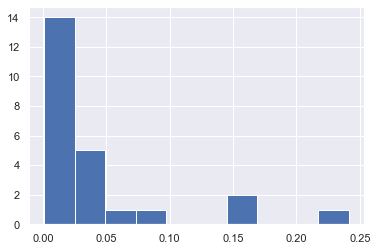

In [ ]:
print(pred[13], test_labels[13])
plt.hist(prob[13])

In [ ]:
temp = (pred - test_labels)
for i in range(len(temp)):
    if temp[i] != 0: print(i)

3
12
13
18
20
21
28
34
41
43
50
53
55
56
61
68
78
82
88
95
96
98
102
109
110
111
122
125
130
132
133
134
136
143
149
150
154
165
167
169
171
173
178
180
192
202
204
210
212
217
218
226
235
237
241
243
248
250
253
254
261
262
266
269
274
275
276
283
285
287
294
295
305
315
328
340
341
346
354
361
362
370
376
379
382
385
387
396
399
401
403
404
410
417
419
428
436
445
447
455
456
460
464
467
469
480
485
486
487
488
489
493
496
504
508
514
519
521
525
531
535
540
553
556
557
561
566
567
572
576
577
580
589
596
598
600
605
621
627
631
636
639
645
646
654
656
658
662
666
668
675
680
682
690
694
699
701
704
706
711
716
718
722
724
739
740
741
745
748
750
751
754
758
763
764
765
771
774
776
780
782
791
797
800
801
807
810
812
821
832
838
839
842
844
845
846
850
856
858
860
863
870
872
873
884
887
890
895
896
899
903
907
911
914
915
922
931
935
946
947
951
955
959
966
967
970
971
973
980
984
990
991
995
997
998
999
1004
1006
1016
1017
1022
1025
1027
1031
1035
1042
1046
1047
1055
1057
1064
1066

Notes:
- make own loss function for randomforest
- mess with binary distribution?


In [ ]:
images = df.iloc[:, :440].to_numpy()
primary_labels = df.iloc[:,441].to_numpy()
secondary_labels = df.iloc[:,442].to_numpy()
# Split into training and testing sets
train_images_p, train_labels_p, test_images_p, test_labels_p = split_data(images, primary_labels)
train_images_s, train_labels_s, test_images_s, test_labels_s = split_data(images, secondary_labels)
images = df.iloc[:, :443].to_numpy()
train_images_fs, train_labels_fs, test_images_fs, test_labels_fs = split_data(images, secondary_labels)
x = np.insert(np.arange(442),0,443)
images = df.iloc[:, x].to_numpy()
train_images_fp, train_labels_fp, test_images_fp, test_labels_fp = split_data(images, primary_labels)

30759
30759
30759
30759


Model with Flux, predicting Primaries

In [ ]:
p_mod = RandomForestClassifier(random_state=0)
p_mod.fit(train_images_p, train_labels_p)
p_acc = p_mod.score(test_images_p, test_labels_p)

In [ ]:
p_acc

0.800780234070221

Model with Flux, predicting Secondaries

In [ ]:
s_mod = RandomForestClassifier(random_state=0)
s_mod.fit(train_images_s, train_labels_s)
s_acc = s_mod.score(test_images_s, test_labels_s)

In [ ]:
s_acc

0.6426527958387517

Model with Flux and Primaries, Predicting Secondaries

In [ ]:
fs_mod = RandomForestClassifier(random_state=0)
fs_mod.fit(train_images_fs, train_labels_fs)
fs_acc = fs_mod.score(test_images_fs, test_labels_fs)

In [ ]:
fs_acc

0.9195058517555267

Model with Flux and Secondaries, Predicting Primaries

In [ ]:
fp_mod = RandomForestClassifier(random_state=0)
fp_mod.fit(train_images_fp, train_labels_fp)
fp_acc = fp_mod.score(test_images_fp, test_labels_fp)

In [ ]:
fp_acc

0.8347204161248375

In [ ]:
p_mod = RandomForestClassifier(random_state=0)
p_mod.fit(train_images_p, train_labels_p)
p_acc = p_mod.score(test_images_p, test_labels_p)

In [ ]:
print(p_acc, s_acc)

0.6430429128738622 0.9227568270481145


In [ ]:
def grid_test(rf):
    bin_results = np.zeros((23,23))
    for primary in range(16,39):
        for secondary in range(primary, 39):
            data = bin_df.loc[(bin_df['primary_type'] == primary) & (bin_df['secondary_type'] == secondary)]
            
            images = data.iloc[:,:440].to_numpy()
            
            try:
                accuracy = rf.score(images, data['secondary_type'].to_numpy())
            except:
                accuracy = 0

            bin_results[primary - 16, secondary - 16] = accuracy
        
    acc_map(bin_results)
    return bin_results

def acc_map(results, title = 'Secondary Prediction Accuracy'):
    plt.figure(figsize = (8,7), facecolor='white')
    ax = sns.heatmap(results, cmap = "mako")
    labels = ['M6','M7','M8','M9','L0','L1','L2','L3','L4','L5','L6','L7','L8','L9','T0','T1','T2','T3','T4','T5','T6','T7','T8']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('10') 
    ax.set_ylabel('Primary')
    ax.set_xlabel('Seconday')
    ax.set_title(title)

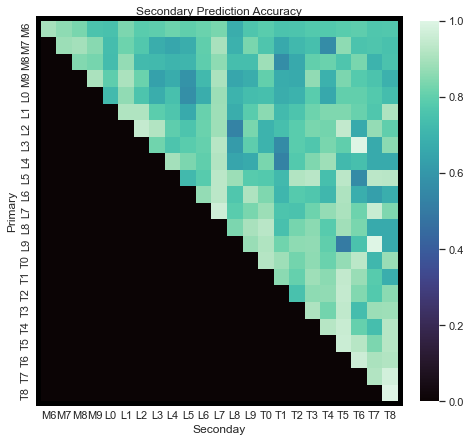

In [ ]:
a = grid_test(s_mod)